In [10]:
import pandas as pd 
import numpy as np 

In [3]:
pip install xlrd

     |████████████████████████████████| 96 kB 3.1 MB/s             
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [11]:
df= pd.read_excel('datasets/Canada.xlsx',
                   engine = 'openpyxl',
                   sheet_name = 'Canada by Citizenship',
                   skiprows = range(20),
                   skipfooter = 2
                
                  )
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [13]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [16]:
df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV','DevName'],
        axis = 1,
        inplace = True
       )
#df.columns

KeyError: "['Type' 'Coverage' 'AREA' 'REG' 'DEV'] not found in axis"

In [17]:
df.columns

df.rename(columns = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'},
          inplace =True
         )

In [18]:
df.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Description of Dataset

*Write down one or two sentences about, from where I got this dataset and, what respresents the dataset

### My variables of interest.
'Country' - It represents the origin of the people, this is Categorical variable.
'Continent' - The continent where it responds that country
'Region' - 
'1980 -2013' - The years

In [19]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [20]:
df.columns = list(map(str, df.columns))
df.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [24]:
df.set_index('Country', inplace = True)
df.head()

KeyError: "None of ['Country'] are in the columns"

In [26]:
df['Total'] = df.iloc[:,
                      2:].sum(axis=1)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398


In [27]:
df.iloc[:,2]

Country
Afghanistan       Developing regions
Albania            Developed regions
Algeria           Developing regions
American Samoa    Developing regions
Andorra            Developed regions
                         ...        
Viet Nam          Developing regions
Western Sahara    Developing regions
Yemen             Developing regions
Zambia            Developing regions
Zimbabwe          Developing regions
Name: DevName, Length: 195, dtype: object

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [29]:
#pip install matplotlib

In [34]:
mpl.style.use('seaborn')

In [31]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


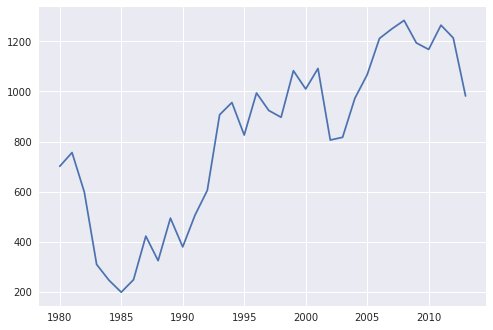

In [35]:
df.loc['Japan','1980':'2013'].plot()

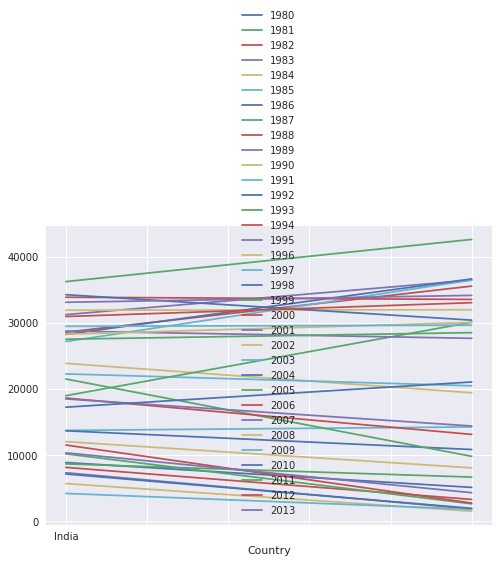

In [38]:
ic_data = df.loc[['India','China'],'1980':'2013']

ic_data.plot()

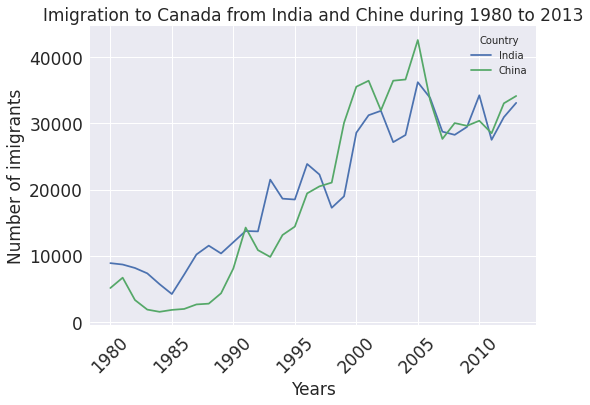

In [47]:
nic= ic_data.transpose()
nic.plot()
plt.xlabel('Years', fontsize = 17)
plt.xticks(fontsize =17, rotation =45)
plt.ylabel('Number of imigrants', fontsize = 17)
plt.yticks(fontsize = 17)
plt.title('Imigration to Canada from India and Chine during 1980 to 2013', fontsize =17)
plt.show()

## Conclusion:

We see a similar imigration pattern from China and India.

# Compare the immigration pattern of top 5 countries. 

In [ ]:
top5 = df.sort_values(['Total'], ascending = False, axis = 0)
top5.head(5)
top5.plot()

In [50]:
#pd.set_option('display.max_columns',500)
#top5

#display all columns.


In [ ]:
top5.transpose()

In [ ]:
top5.drop(['Continent', 'Region','Total'],
          axis = 1,
          inplace = True
         )
top5.plot()

In [ ]:
x = top5.transpose()
x.plot()